In [1]:
import scipy
import os 

%load_ext autoreload
%autoreload 2
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from data.KTH.kth import *
from data.MMNIST.mmnist import *

kth_data_dir = "data/KTH/kth/"
mmnist_data_dir = "data/MMNIST/" 

batch_size = 40
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Load MMNIST dataset**

In [3]:
train_loader, val_loader,test_loader = MMNIST(mmnist_data_dir, batch_size = batch_size, seq_first=True, device=device)

In [4]:
sample_batch = next(iter(train_loader))
print("MMNIST Data Statistics:")
print(f"Train loader len: {len(train_loader)}, Total training sequences: {len(train_loader) * batch_size}")
print(f"Val loader len: {len(val_loader)}, Total validation sequences: {len(val_loader) * batch_size}")
print(f"Test loader len: {len(test_loader)}, Total testing sequences: {len(test_loader) * batch_size}")
print(f"Shape of batch: {sample_batch.shape}")

MMNIST Data Statistics:
Train loader len: 200, Total training sequences: 8000
Val loader len: 25, Total validation sequences: 1000
Test loader len: 50, Total testing sequences: 2000
Shape of batch: torch.Size([20, 40, 1, 64, 64])


**Visualize MMNIST Samples**

In [5]:
pred_batch = next(iter(train_loader))

In [25]:
from utils.visualizations import *
save_gif_batch(sample_batch, pred_batch, nsamples=5, text = "test", show = True)

------------Past Frames (First 10 frames of the sequence)----------------


------------actual Frames (Next 10 frames of the sequence)----------------


------------predicted frames(predicted 10 frames of the sequence)----------------


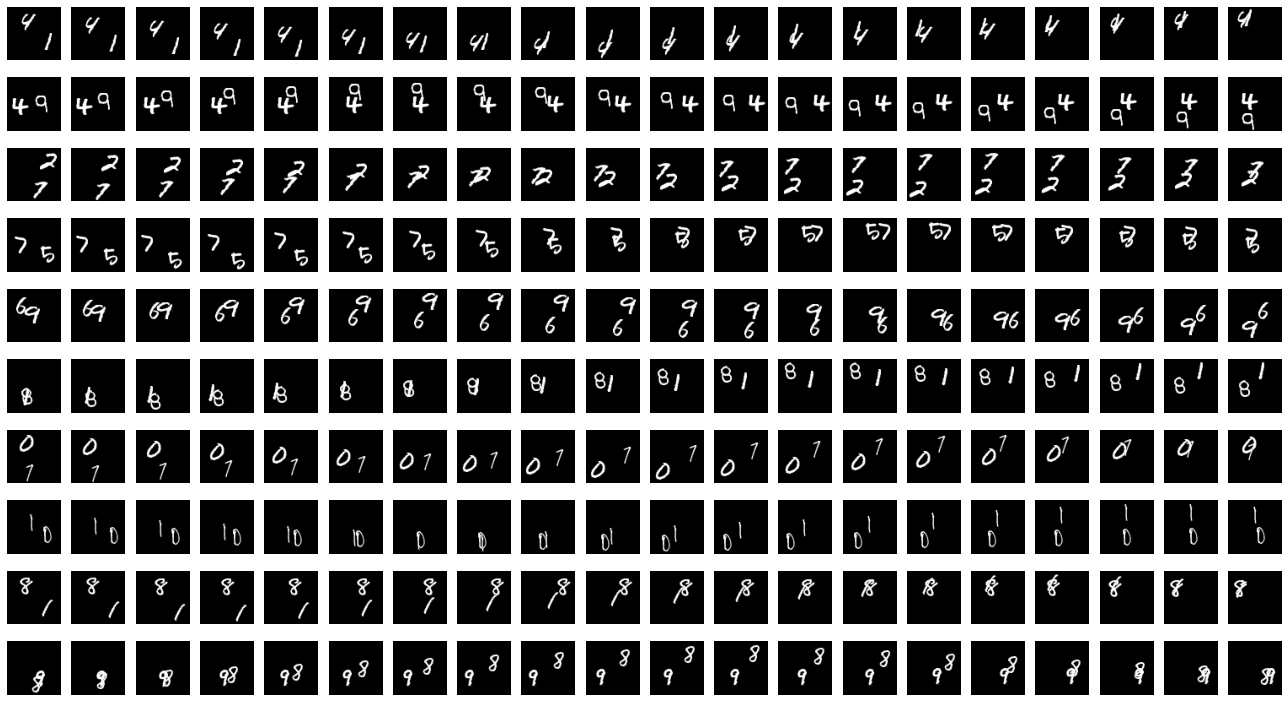

In [32]:
from utils.visualizations import *

save_grid_batch(sample_batch, pred_batch, nsamples=5, text = "test", show = True)

**Load KTH dataset**

In [33]:
train_loader, val_loader,test_loader = get_KTH(kth_data_dir, batch_size = 40, seq_first=True, frame_skip=10, device = "cpu")

In [34]:
sample_batch = next(iter(train_loader))
print("KTH Data Statistics:")
print(f"Train loader len: {len(train_loader)}, Total training sequences: {len(train_loader) * batch_size}")
print(f"Val loader len: {len(val_loader)}, Total validation sequences: {len(val_loader) * batch_size}")
print(f"Test loader len: {len(test_loader)}, Total testing sequences: {len(test_loader) * batch_size}")
print(f"Shape of batch: {sample_batch[0].shape}")

e:\RWTH\WS21-22\Lab CudaVision\video-prediction\video-prediction\code\data\KTH\kth.py:134: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch[i]['seq'] = torch.tensor(batch[i]['seq']) / 255.0


KTH Data Statistics:
Train loader len: 50, Total training sequences: 2000
Val loader len: 94, Total validation sequences: 3760
Test loader len: 102, Total testing sequences: 4080
Shape of batch: torch.Size([20, 40, 1, 128, 128])


**Visualize KTH samples**

In [35]:
pred_batch = next(iter(train_loader))
from utils.visualizations import *
save_gif_batch(sample_batch[0], pred_batch[0], nsamples=5,text = "kth", show = True)

e:\RWTH\WS21-22\Lab CudaVision\video-prediction\video-prediction\code\data\KTH\kth.py:134: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch[i]['seq'] = torch.tensor(batch[i]['seq']) / 255.0


------------Past Frames (First 10 frames of the sequence)----------------


------------actual Frames (Next 10 frames of the sequence)----------------


------------predicted frames(predicted 10 frames of the sequence)----------------


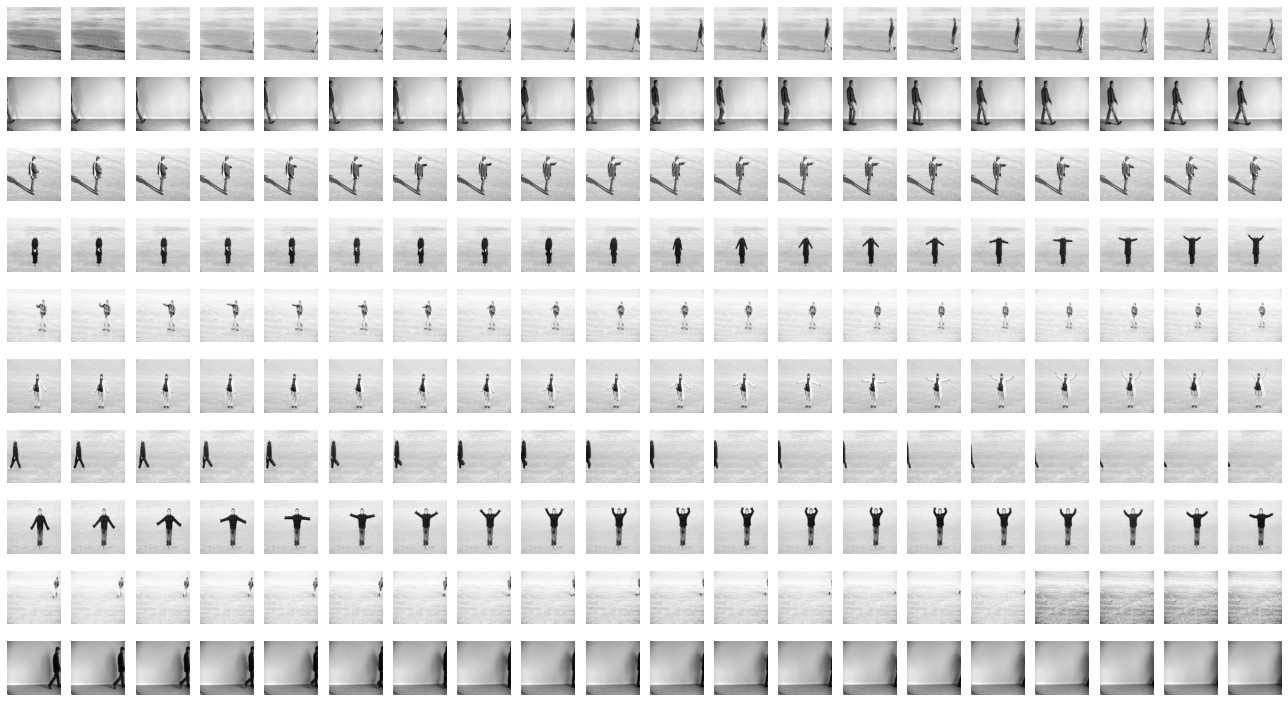

In [36]:
save_grid_batch(sample_batch[0], pred_batch[0], nsamples=5,text = "kth", show = True)